In [9]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Dataset, random_split
import torch.optim  as optim
import numpy as np
import matplotlib.pyplot as plt
import time
from copy import deepcopy
import shap

from models.LSTM_EEG import LSTMEEG, restore_parameters, train_LSTMEEG, evaluation_eeglstm
from utils import MakeDataset, generation_lstm_data, generation_lstm_con_data, generation_lstm_noisedata

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.enabled = False

In [2]:
path = './{}/base/{}.csv'
path_list = ['./{}/base/{}.csv', './{}/noise/{}.csv']
task = ['10','20','1back','3back']

# CYY LSTM base

In [3]:
cyy_lstm_eeg_input, cyy_lstm_output = generation_lstm_data(path, 'cyy', task,  device)

10
20
1back
3back


In [4]:
print(cyy_lstm_eeg_input.size())
print(cyy_lstm_output.size())

torch.Size([2048, 120, 32])
torch.Size([2048])


In [6]:
dataset = MakeDataset(cyy_lstm_eeg_input, cyy_lstm_output)
train_dataset, test_dataset = random_split(dataset, [1536,512])
trainloader = DataLoader(train_dataset, 
                         batch_size=256, 
                         shuffle=True)

testloader = DataLoader(test_dataset,
                        batch_size = 256,
                        shuffle=True)


In [29]:
model = LSTMEEG(32, 10)
his = train_LSTMEEG(model, trainloader, 500, 0.001, device= device)

Epoch 10 / 500: Loss = 1.055
Epoch 20 / 500: Loss = 1.038
Epoch 30 / 500: Loss = 1.022
Epoch 40 / 500: Loss = 1.006
Epoch 50 / 500: Loss = 0.994
Epoch 60 / 500: Loss = 0.983
Epoch 70 / 500: Loss = 0.973
Epoch 80 / 500: Loss = 0.963
Epoch 90 / 500: Loss = 0.955
Epoch 100 / 500: Loss = 0.947
Epoch 110 / 500: Loss = 0.941
Epoch 120 / 500: Loss = 0.935
Epoch 130 / 500: Loss = 0.930
Epoch 140 / 500: Loss = 0.923
Epoch 150 / 500: Loss = 0.918
Epoch 160 / 500: Loss = 0.911
Epoch 170 / 500: Loss = 0.907
Epoch 180 / 500: Loss = 0.901
Epoch 190 / 500: Loss = 0.897
Epoch 200 / 500: Loss = 0.892
Epoch 210 / 500: Loss = 0.890
Epoch 220 / 500: Loss = 0.884
Epoch 230 / 500: Loss = 0.879
Epoch 240 / 500: Loss = 0.876
Epoch 250 / 500: Loss = 0.873
Epoch 260 / 500: Loss = 0.870
Epoch 270 / 500: Loss = 0.868
Epoch 280 / 500: Loss = 0.868
Epoch 290 / 500: Loss = 0.865
Epoch 300 / 500: Loss = 0.861
Epoch 310 / 500: Loss = 0.859
Epoch 320 / 500: Loss = 0.857
Epoch 330 / 500: Loss = 0.856
Epoch 340 / 500: Lo

In [12]:
train_pred_list, train_target_list, test_pred_list, test_target_list = evaluation_eeglstm(model, trainloader, testloader, 256, device)

Train dataset loss : 0.7032074431578318
Train dataset acc :87.109375%
Test dataset loss : 0.9099502861499786
Test dataset acc :61.1328125%


In [13]:
explainer_shap = shap.DeepExplainer(model, cyy_lstm_eeg_input.float()[:100]) 
shap_values = explainer_shap.shap_values(cyy_lstm_eeg_input.float()[:100])

Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [14]:
eeg_col = ['EEG.Cz', 'EEG.Fz', 'EEG.Fp1',  'EEG.F7', 'EEG.F3', 'EEG.FC1', 'EEG.C3','EEG.FC5',
           'EEG.FT9', 'EEG.T7','EEG.CP5',  'EEG.CP1', 'EEG.P3', 'EEG.P7', 'EEG.PO9', 'EEG.O1',
           'EEG.Pz', 'EEG.Oz', 'EEG.O2', 'EEG.PO10', 'EEG.P8', 'EEG.P4', 'EEG.CP2', 'EEG.CP6',
            'EEG.T8', 'EEG.FT10', 'EEG.FC6', 'EEG.C4', 'EEG.FC2', 'EEG.F4', 'EEG.F8', 'EEG.Fp2']

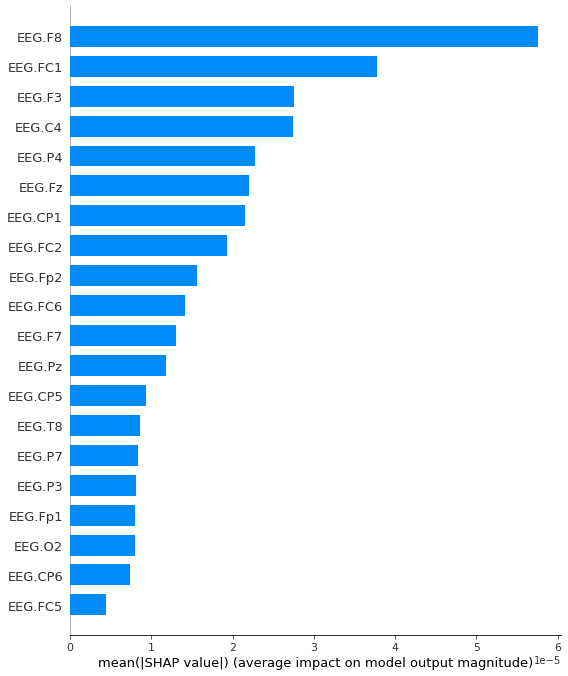

In [15]:
shap.summary_plot(shap_values[0][:, 0, :], cyy_lstm_eeg_input[:100].detach().cpu().numpy()[:, 0, :], 
                  feature_names=eeg_col, plot_type='bar')

# CYY CON

In [16]:
cyy_eeg_input_con, output_con = generation_lstm_con_data(path_list, 'cyy', task, device)

10
20
1back
3back
10
20
1back
3back


In [17]:
print(cyy_eeg_input_con.size())
print(output_con.size())

torch.Size([2048, 120, 32])
torch.Size([2048])


In [18]:
dataset_con = MakeDataset(cyy_eeg_input_con, output_con)
train_dataset_con, test_dataset_con = random_split(dataset_con, [1536,512])
trainloader_con = DataLoader(train_dataset_con, 
                         batch_size=256, 
                         shuffle=True)

testloader_con = DataLoader(test_dataset_con,
                        batch_size = 256,
                        shuffle=True)


In [19]:
model_con = LSTMEEG(32, 20)
his_con = train_LSTMEEG(model_con, trainloader, 300, 0.001, device= device)

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 10 / 300: Loss = 1.052
Epoch 20 / 300: Loss = 1.007
Epoch 30 / 300: Loss = 0.969
Epoch 40 / 300: Loss = 0.938
Epoch 50 / 300: Loss = 0.911
Epoch 60 / 300: Loss = 0.889
Epoch 70 / 300: Loss = 0.869
Epoch 80 / 300: Loss = 0.852
Epoch 90 / 300: Loss = 0.839
Epoch 100 / 300: Loss = 0.827
Epoch 110 / 300: Loss = 0.818
Epoch 120 / 300: Loss = 0.807
Epoch 130 / 300: Loss = 0.797
Epoch 140 / 300: Loss = 0.789
Epoch 150 / 300: Loss = 0.781
Epoch 160 / 300: Loss = 0.777
Epoch 170 / 300: Loss = 0.768
Epoch 180 / 300: Loss = 0.762
Epoch 190 / 300: Loss = 0.756
Epoch 200 / 300: Loss = 0.749
Epoch 210 / 300: Loss = 0.750
Epoch 220 / 300: Loss = 0.744
Epoch 230 / 300: Loss = 0.740
Epoch 240 / 300: Loss = 0.737
Epoch 250 / 300: Loss = 0.736
Epoch 260 / 300: Loss = 0.733
Epoch 270 / 300: Loss = 0.731
Epoch 280 / 300: Loss = 0.726
Epoch 290 / 300: Loss = 0.724
Epoch 300 / 300: Loss = 0.722


In [20]:
train_pred_list_con, train_target_list_con, test_pred_list_con, test_target_list_con = evaluation_eeglstm(model_con,
                                                                                                           trainloader_con,
                                                                                                        testloader_con, 256, device)

Train dataset loss : 0.9229000906149546
Train dataset acc :61.65364980697632%
Test dataset loss : 0.9073489308357239
Test dataset acc :64.2578125%


In [21]:
explainer_shap_con = shap.DeepExplainer(model_con, cyy_eeg_input_con.float()[:100]) 
shap_values_con = explainer_shap_con.shap_values(cyy_eeg_input_con.float()[:100])

Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


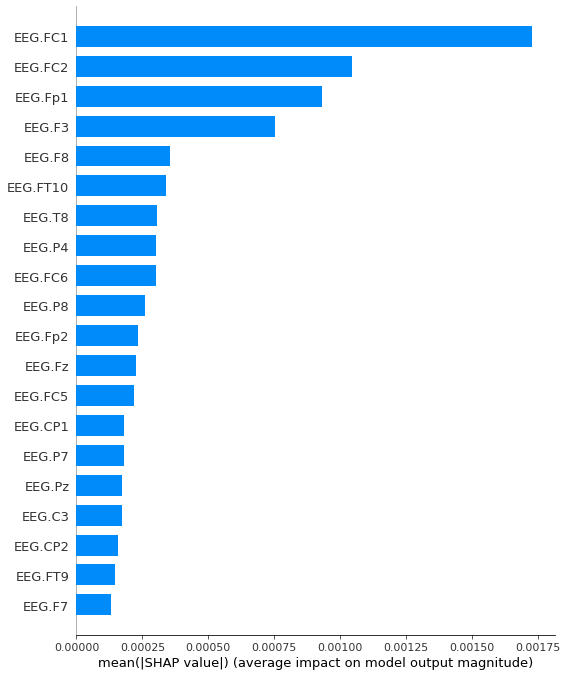

In [22]:
shap.summary_plot(shap_values_con[0][:, 0, :], cyy_eeg_input_con[:100].detach().cpu().numpy()[:, 0, :], 
                  feature_names=eeg_col, plot_type='bar')

# CYY noise

In [23]:
eeg_input_noise, output_noise =  generation_lstm_noisedata('./{}/noise/{}.csv', 'cyy', task, device)

10
20
1back
3back


In [24]:
print(eeg_input_noise.size())
print(output_noise.size())

dataset_noise = MakeDataset(eeg_input_noise, output_noise)
train_dataset_noise, test_dataset_noise = random_split(dataset_noise, [1536,512])
trainloader_noise = DataLoader(train_dataset_noise, 
                         batch_size=256, 
                         shuffle=True)

testloader_noise = DataLoader(test_dataset_noise,
                        batch_size = 256,
                        shuffle=True)


torch.Size([2048, 120, 32])
torch.Size([2048])


In [25]:
model_noise = LSTMEEG(32, 20)
his_con = train_LSTMEEG(model_noise, trainloader_noise, 300, 0.001, device= device)

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 10 / 300: Loss = 1.030
Epoch 20 / 300: Loss = 0.972
Epoch 30 / 300: Loss = 0.926
Epoch 40 / 300: Loss = 0.881
Epoch 50 / 300: Loss = 0.850
Epoch 60 / 300: Loss = 0.824
Epoch 70 / 300: Loss = 0.803
Epoch 80 / 300: Loss = 0.787
Epoch 90 / 300: Loss = 0.775
Epoch 100 / 300: Loss = 0.759
Epoch 110 / 300: Loss = 0.747
Epoch 120 / 300: Loss = 0.740
Epoch 130 / 300: Loss = 0.737
Epoch 140 / 300: Loss = 0.723
Epoch 150 / 300: Loss = 0.716
Epoch 160 / 300: Loss = 0.707
Epoch 170 / 300: Loss = 0.699
Epoch 180 / 300: Loss = 0.693
Epoch 190 / 300: Loss = 0.686
Epoch 200 / 300: Loss = 0.682
Epoch 210 / 300: Loss = 0.678
Epoch 220 / 300: Loss = 0.672
Epoch 230 / 300: Loss = 0.670
Epoch 240 / 300: Loss = 0.666
Epoch 250 / 300: Loss = 0.664
Epoch 260 / 300: Loss = 0.659
Epoch 270 / 300: Loss = 0.667
Epoch 280 / 300: Loss = 0.656
Epoch 290 / 300: Loss = 0.654
Epoch 300 / 300: Loss = 0.652


In [26]:
train_pred_list_noise, train_target_list_noise, test_pred_list_noise, test_target_list_noise = evaluation_eeglstm(model_noise,
                                                                                                           trainloader_noise,
                                                                                                        testloader_noise, 256, device)

Train dataset loss : 0.6504413187503815
Train dataset acc :92.31771230697632%
Test dataset loss : 0.8493985831737518
Test dataset acc :70.5078125%


In [27]:
explainer_shap_noise = shap.DeepExplainer(model_noise, eeg_input_noise.float()[:100]) 
shap_values_noise = explainer_shap_noise.shap_values(eeg_input_noise.float()[:100])

Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


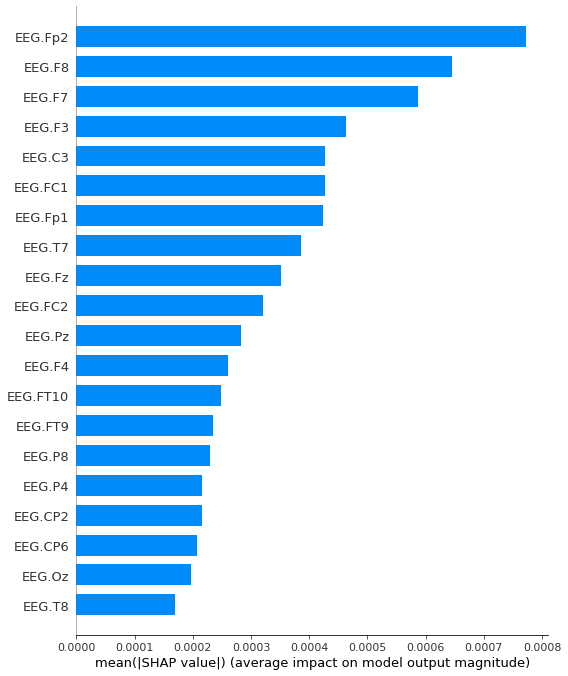

In [28]:
shap.summary_plot(shap_values_noise[0][:, 0, :], eeg_input_noise[:100].detach().cpu().numpy()[:, 0, :], 
                  feature_names=eeg_col, plot_type='bar')